In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('/content/weatherHistory.csv')
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [ ]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)

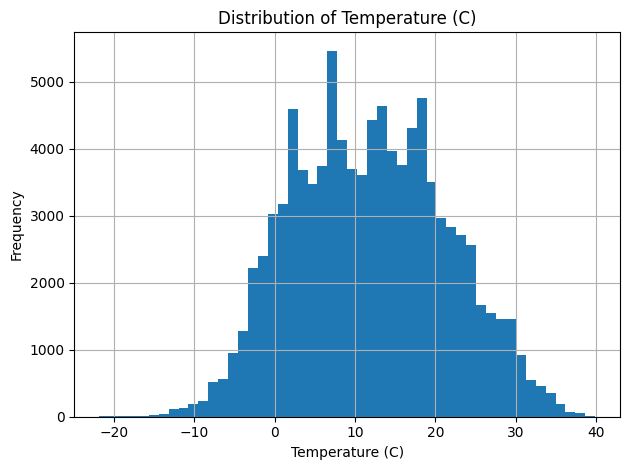

In [ ]:
plt.figure()
df['Temperature (C)'].hist(bins=50)
plt.title('Distribution of Temperature (C)')
plt.xlabel('Temperature (C)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

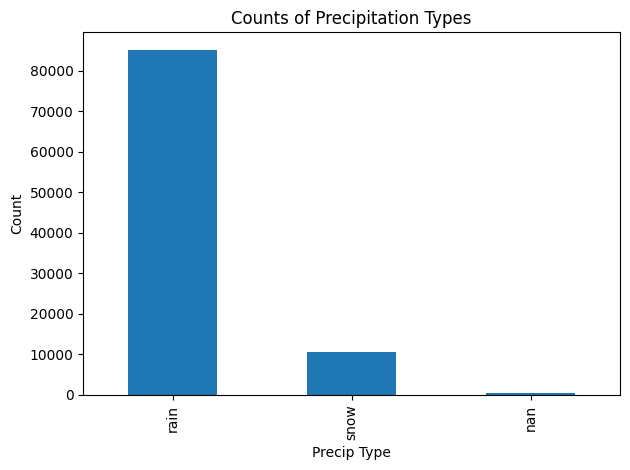

In [ ]:
plt.figure()
df['Precip Type'].value_counts(dropna=False).plot(kind='bar')
plt.title('Counts of Precipitation Types')
plt.xlabel('Precip Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

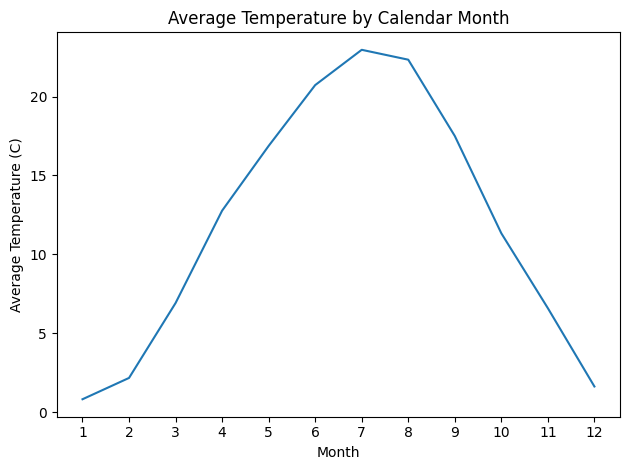

In [ ]:
df['month'] = df['Formatted Date'].dt.month
monthly_avg = df.groupby('month')['Temperature (C)'].mean()
plt.figure()
monthly_avg.plot()
plt.title('Average Temperature by Calendar Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature (C)')
plt.xticks(range(1,13))
plt.tight_layout()
plt.show()

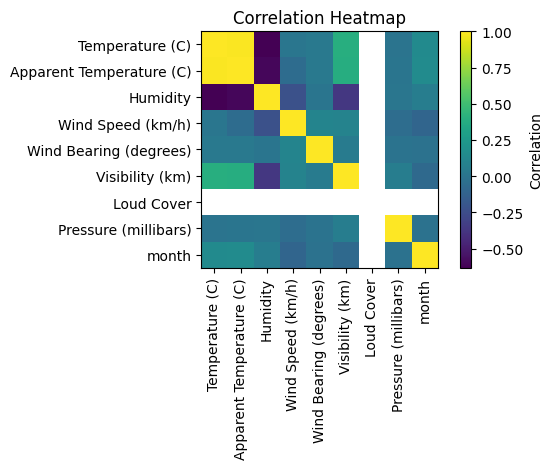

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

plt.figure()
corr = df[numeric_cols].corr()
plt.imshow(corr, interpolation='nearest')
plt.colorbar(label='Correlation')
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import joblib

# Загрузка и обработка вашего CSV
df = pd.read_csv('weatherHistory.csv')
df = df.dropna(subset=['Precip Type'])
df['Rain'] = df['Precip Type'].apply(lambda x: 1 if x == 'rain' else 0)

# Преобразуем колонку в datetime
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True, errors='coerce')

# Удалим строки, где не удалось преобразовать дату
df = df.dropna(subset=['Formatted Date'])

# Теперь можно безопасно извлекать час
df['Hour'] = df['Formatted Date'].dt.hour

# Смещение на 6 часов вперёд
df = df.sort_values('Formatted Date').reset_index(drop=True)
df['Rain_in_6h'] = df['Rain'].shift(-6)
df = df.dropna(subset=['Rain_in_6h'])

# Признаки и целевая переменная
X = df[['Temperature (C)', 'Humidity', 'Pressure (millibars)', 'Hour']]
y = df['Rain_in_6h'].astype(int)

# Масштабирование
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Обучение
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Сохранение
joblib.dump(model, 'rain_model_v161.pkl')
joblib.dump(scaler, 'rain_scaler_v161.pkl')


['rain_scaler_v161.pkl']

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, mean_squared_error

In [ ]:
df = pd.read_csv('/content/weatherHistory.csv', usecols=['Formatted Date', 'Temperature (C)', 'Humidity', 'Pressure (millibars)', 'Precip Type'])
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)

# Unit conversions
df['Pressure_mmHg'] = df['Pressure (millibars)'].replace(0, np.nan) / 1.33322
df['Pressure_mmHg'] = df['Pressure_mmHg'].fillna(df['Pressure_mmHg'].median())
df['HumidityPct'] = df['Humidity'] * 100

# Time features
df['hour'] = df['Formatted Date'].dt.hour
df['dow'] = df['Formatted Date'].dt.dayofweek
df['month'] = df['Formatted Date'].dt.month

In [ ]:
df = df.sort_values('Formatted Date').reset_index(drop=True)
df['is_rain_now'] = (df['Precip Type'] == 'rain').astype(int)
df.loc[df['Precip Type'].isna(), 'is_rain_now'] = 0
shift = 6
df['rain_in_6h'] = df['is_rain_now'].shift(-shift)
df['temp_in_6h'] = df['Temperature (C)'].shift(-shift)
df = df.dropna(subset=['rain_in_6h', 'temp_in_6h'])

In [ ]:
features = ['Temperature (C)', 'HumidityPct', 'Pressure_mmHg', 'hour', 'dow', 'month']
X = df[features]
y_rain = df['rain_in_6h'].astype(int)
y_temp = df['temp_in_6h']

In [ ]:
split_idx = int(0.8 * len(df))
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_rain_train, y_rain_test = y_rain.iloc[:split_idx], y_rain.iloc[split_idx:]
y_temp_train, y_temp_test = y_temp.iloc[:split_idx], y_temp.iloc[split_idx:]

In [ ]:
classifiers = {
    'LogReg': Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression(max_iter=1000))]),
    'RF': RandomForestClassifier(n_estimators=200, random_state=42),
    'GB': GradientBoostingClassifier(random_state=42)
}

class_results = []
for name, model in classifiers.items():
    model.fit(X_train, y_rain_train)
    preds = model.predict(X_test)
    probs = model.predict_proba(X_test)[:,1]
    class_results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_rain_test, preds),
        'F1': f1_score(y_rain_test, preds),
        'ROC_AUC': roc_auc_score(y_rain_test, probs)
    })

class_df = pd.DataFrame(class_results).set_index('Model')
class_df

,Accuracy,F1,ROC_AUC
Model,,,
LogReg,0.942509,0.968793,0.906158
RF,0.947952,0.971608,0.874818
GB,0.950078,0.972790,0.885542


In [ ]:
best_class_name = class_df['ROC_AUC'].idxmax()
best_class_model = classifiers[best_class_name]
best_class_model.fit(X, y_rain)
rain_model_path = 'best_rain_model_limited.pkl'
joblib.dump(best_class_model, rain_model_path)

['best_rain_model_limited.pkl']

In [ ]:
best_class_name

'LogReg'

In [ ]:
regressors = {
    'LinReg': Pipeline([('scaler', StandardScaler()), ('reg', LinearRegression())]),
    'RF': RandomForestRegressor(n_estimators=200, random_state=42),
    'GB': GradientBoostingRegressor(random_state=42)
}

reg_results = []
for name, model in regressors.items():
    model.fit(X_train, y_temp_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_temp_test, preds))
    reg_results.append({'Model': name, 'RMSE': rmse})

reg_df = pd.DataFrame(reg_results).set_index('Model')
reg_df

,RMSE
Model,
LinReg,3.595470
RF,2.246108
GB,2.320727


In [ ]:
best_reg_name = reg_df['RMSE'].idxmin()
best_reg_model = regressors[best_reg_name]
best_reg_model.fit(X, y_temp)
temp_model_path = 'best_temp_model_limited.pkl'
joblib.dump(best_reg_model, temp_model_path)

['best_temp_model_limited.pkl']

In [ ]:
best_reg_name

'RF'